# Model Applying

Let's look how different models solve this problem. We have a task of binary classification.

In this notebook we will quickly use some famous models with printing some information about their succsess in solving this task.
Perhaps in the next notebooks we will use them more precisely and try to find the best hyperparameters for each of them

First of all we need to recall that we have 3 non-categorical features. Each of them has different scale (For example TotalCharges has value from 0 to 8000)



In [3]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
data=pd.read_csv("data.csv")
enc_data=pd.read_csv("encoded_data.csv")

## Content

<ol>
    <li><a href="#feature-scaling">Feature scaling</a></li>
    <li><a href="#knn">KNN</a>
        <ul>
            <li><a href="#knn-training">Training</a></li>
            <li><a href="#knn-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#logistic-regression">Logistic Regression</a>
        <ul>
            <li><a href="#logistic-regression-training">Training</a></li>
            <li><a href="#logistic-regression-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#svm">SVM</a>
        <ul>
            <li><a href="#svm-training">Training</a></li>
            <li><a href="#svm-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#random-forest">Random Forest</a>
        <ul>
            <li><a href="#random-forest-training">Training</a></li>
            <li><a href="#random-forest-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#ada-boost">AdaBoost</a>
        <ul>
            <li><a href="#ada-boost-training">Training</a></li>
            <li><a href="#ada-boost-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id="feature-scaling"></a>
## Feature scaling

For the scaling of numerical features the standart scaling was choosen. At first we need to split our data into train and test subsets.
Only after this we are able to use Scaler because if we scale our data before splitting the test set will have some information about train set.

In [5]:
X = enc_data.drop(columns = ['Churn', "customerID"])
y = enc_data['Churn'].values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   float64
 1   SeniorCitizen                            7043 non-null   float64
 2   Partner                                  7043 non-null   float64
 3   Dependents                               7043 non-null   float64
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   float64
 6   MultipleLines                            7043 non-null   float64
 7   OnlineSecurity                           7043 non-null   float64
 8   OnlineBackup                             7043 non-null   float64
 9   DeviceProtection                         7043 non-null   float64
 10  TechSupport                              7043 no

During the splitting we will use stratification technique because we have disbalance in our target classes

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5, stratify=y)

In [7]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id="knn"></a>
## KNN 
The first model that we will try to apply will be KNN

<a id="knn-training"></a>
### KNN Training

In [8]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7836456558773425


<a id="knn-evaluating"></a>
### KNN Evaluating

In [9]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1294
         1.0       0.62      0.46      0.53       467

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



What we see? Total accuracy is 78%. But accuracy is very sensitive to disbalanced classes. Precision as vell as recall has high values on class 0 and on the other hand low values on class 1.

This can mean that our model can make naive prediction or something like naive prediction and classify all objects like class 0.
For the KNN model it's pretty natural because it classify every objects looking ar how many objects of each class are nearby.

Despite this let's plot f1-score for test and train set for different values of n_neighbors parameter (for different values of model complexity)

We can plot confusion matrix for each classifier that we use

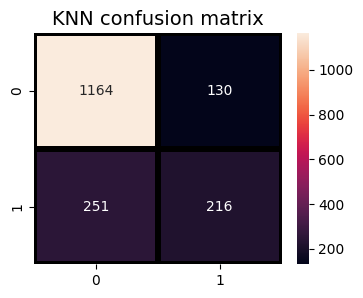

In [10]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN confusion matrix",fontsize=14)
plt.show()

In [11]:
N = 30

f1_train = []
f1_test = []
for n_neighbors in range(1, N+1):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    predicted_test_y = knn_model.predict(X_test)
    predicted_train_y = knn_model.predict(X_train)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_train, predicted_train_y))

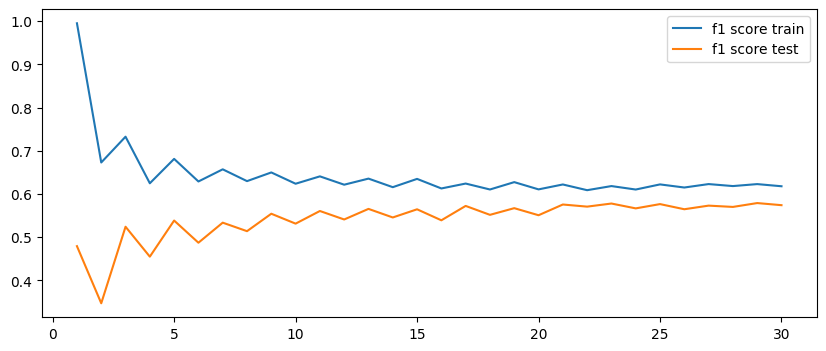

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

We see that for both train and test samples f1 score for KNN seems to converge to some value across 0.6. This is to weak to use such a model in real life

<a id="logistic-regression"></a>
## Logistic Regression

Now let's try to use logistic regression

<a id="logistic-regression-training"></a>
### Training

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
predicted_y = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7978421351504826


<a id="logistic-regression-evaluating"></a>
### Evaluating

In [14]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1294
         1.0       0.66      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



We see that Logistic Regressiong has better precision and recall for both classes, as vell as accuracy

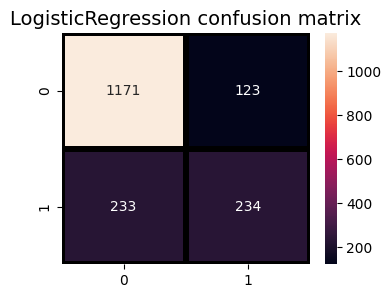

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression confusion matrix",fontsize=14)
plt.show()

<a id="svm"></a>
## SVM

<a id="svm-training"></a>
## Training

In [16]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predicted_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7927314026121521


<a id="svm-evaluating"></a>
## Evaluating

In [17]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1294
         1.0       0.65      0.47      0.54       467

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



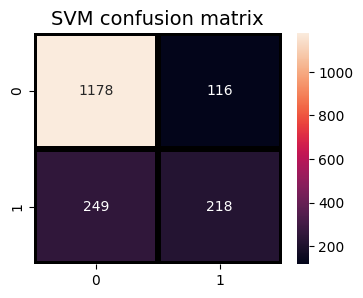

In [18]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM confusion matrix",fontsize=14)
plt.show()

<a id="random-forest"></a>
## RandomForest

Of course we can try to use one Decision tree but we will use the ensemble of that trees

<a id="random-forest-training"></a>
### Training

In [19]:
model_rf = RandomForestClassifier(n_estimators=300, oob_score = True, n_jobs = -1,
                                  random_state=40, max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
predicted_y = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, predicted_y))

0.7893242475865985


<a id="random-forest-evaluating"></a>
### Evaluating

In [20]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      1294
         1.0       0.65      0.44      0.52       467

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.69      1761
weighted avg       0.77      0.79      0.77      1761



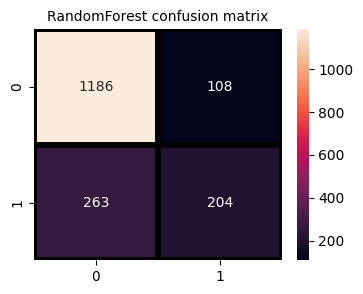

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest confusion matrix",fontsize=10)
plt.show()

We see that RandomForest has even worse recall than other algorithms
Let's plot f1-score for different values of n_estimators

In [22]:
N = 300

f1_train = []
f1_test = []
for n_estimators in tqdm(range(1, N+1)):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs = -1,
                                      random_state=40, max_leaf_nodes = 30)
    rf_model.fit(X_train, y_train)
    predicted_test_y = rf_model.predict(X_test)
    predicted_train_y = rf_model.predict(X_train)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_train, predicted_train_y))

100%|█████████████████████████████████████████| 300/300 [01:05<00:00,  4.61it/s]


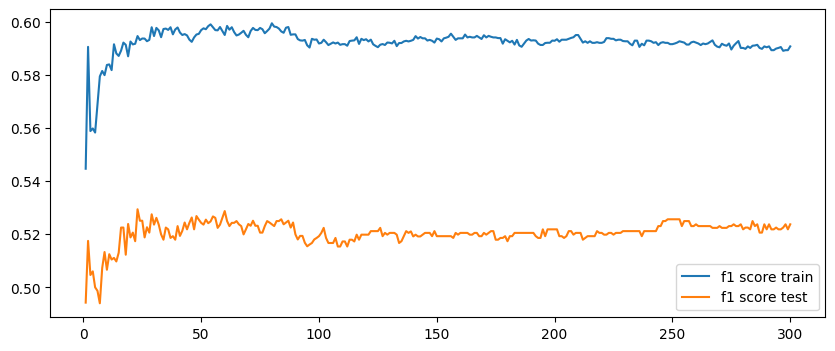

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

<a id="ada-boost"></a>
## AdaBoost

<a id="ada-boost-training"></a>
### Training

In [24]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
predicted_y = ada_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, predicted_y)

AdaBoost Classifier accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.797274275979557

<a id="ada-boost-evaluating"></a>
### Evaluating

In [25]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1294
         1.0       0.65      0.51      0.57       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



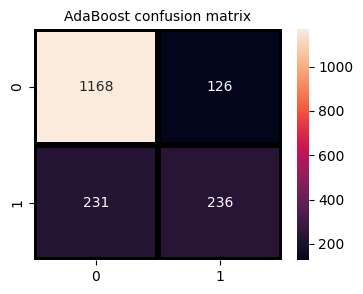

In [26]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost confusion matrix",fontsize=10)
plt.show()

<a id="conclusions"></a>
## Conclusions

For our task we've tried to use several famous models and got the next results (without precise tuning of hyperparameters):

**TIP:** recall and precision will be for class 1 since the main task is to retrieve customers who want to churn 

1. **KNN** &ndash; basic accuracy with *n_neighbors=10* has 78% accuracy, precision of 62% and recall of 46%. When we bruteforced the only one parameter of n_neighbors from 1 to 30 it turned out that f1-score of KNN seems to converge to some value near 0.6. Since f1-score is a harmonic mean of recall and precision it means that some of this values are less than 0.6 for every bruteforced value of the hyperparameter. So either this algorithm is not good for the task or it need some futher research<br><br>
2. **Logistic Regression** &ndash; gives us accuracy of almost 79.8% with precision of 66% and recall equal to 50%. Looks a little bit better but still terrible for using in real life (bacause the fact that only 50% of objects that were classified as Churn-objects are really Churn-objects and only 66% from all objects with class "Churn" were detected is awfull)<br><br>
3. **SVM** &ndash; has an accuracy of 79.3%, precision of 65% and recall 47%.<br><br>
4. **RandomForest** &ndash;  accuracy 78.9%, precision 65% and recall 44%<br><br>
5. **AdaBoost** &ndash; accuracy 79.7%, precision 65% and recall 51%

<p>What we see generally? All used models have low precision and recall (espessially recall). That means that models detect the class 1 badly and about a half of customers which are going to churn will be not detected.</p>
<p>Also that means that we need to make a closer research in our data and parameters of our models</p>

